# 1-Librairies

In [7]:
# Dataset
import kagglehub

# Standard libraries
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import tqdm as notebook_tqdm
import numpy as np
from glob import glob
import seaborn as sns

# Suppression des warnings
import warnings
warnings.filterwarnings("ignore")

# 2-Dataset

In [2]:
# Téléchargement du dataset depuis Kaggle
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")
print("Chemin d'accés du dossier du Dataset:", path)

class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']
# Define the directories for training and testing images
train_dir = os.path.join(path, 'Training')
test_dir = os.path.join(path, 'Testing')

# Initialize lists to store image paths and labels
train_data = []
test_data = []

for label in class_names:
    train_images = glob(os.path.join(train_dir, label, '*.jpg'))
    test_images = glob(os.path.join(test_dir, label, '*.jpg'))
    
    # Append the paths and corresponding labels to lists
    train_data.extend([(img_path, label) for img_path in train_images])
    test_data.extend([(img_path, label) for img_path in test_images])

# Convert to DataFrame for easier manipulation
train_df = pd.DataFrame(train_data, columns=['image_path', 'label'])
test_df = pd.DataFrame(test_data, columns=['image_path', 'label'])

Chemin d'accés du dossier du Dataset: C:\Users\mgraz\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1


# 3-Analyse Exploratoire des Données (EDA)

## 3.1-Visualisation des datasets

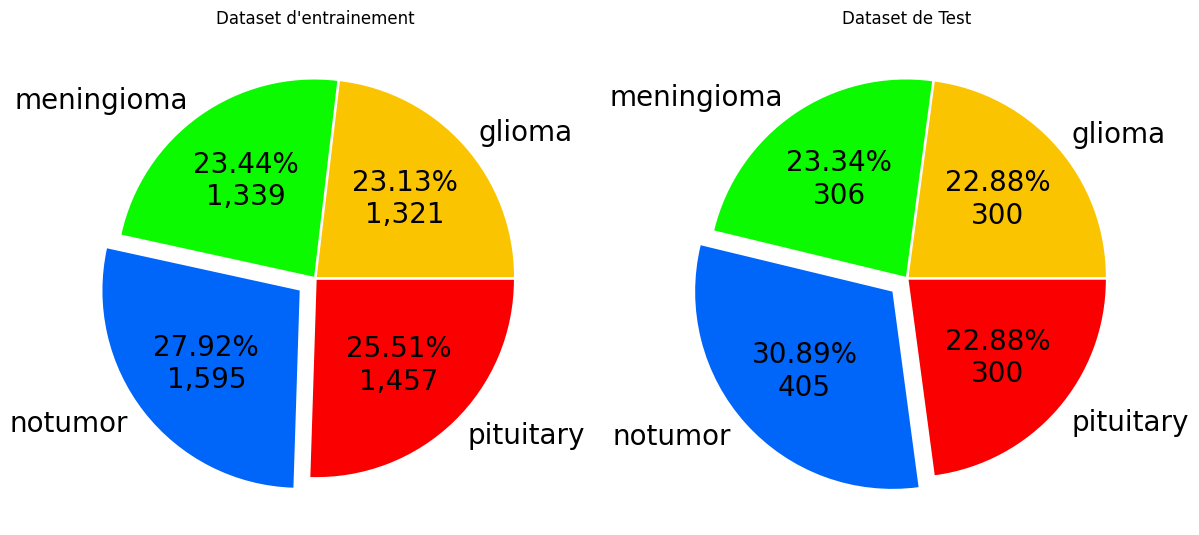

In [ ]:
# Visualisation des données
_, ax = plt.subplots(ncols=2, figsize=(14, 14))

# Graphique 0
train_class_counts = train_df['label'].value_counts()
train_class_counts = train_class_counts.reindex(class_names)

ax[0].set_title("Dataset d'entrainement")
ax[0].pie(
    train_class_counts,
    labels=[label for label in class_names],
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(train_class_counts) / 100),
    explode=(0.01, 0.01, 0.1, 0.01),
    textprops={'fontsize': 20}
)

# Graphique 1
test_class_counts = test_df['label'].value_counts()
test_class_counts = test_class_counts.reindex(class_names)

ax[1].set_title('Dataset de Test')
ax[1].pie(
    test_class_counts,
    labels=[label for label in class_names],
    colors=['#FAC500', '#0BFA00', '#0066FA', '#FA0000'],
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(test_class_counts) / 100),
    explode=(0.01, 0.01, 0.1, 0.01),
    textprops={'fontsize': 20}
)

plt.show()


## 3.2-Affichage d'images

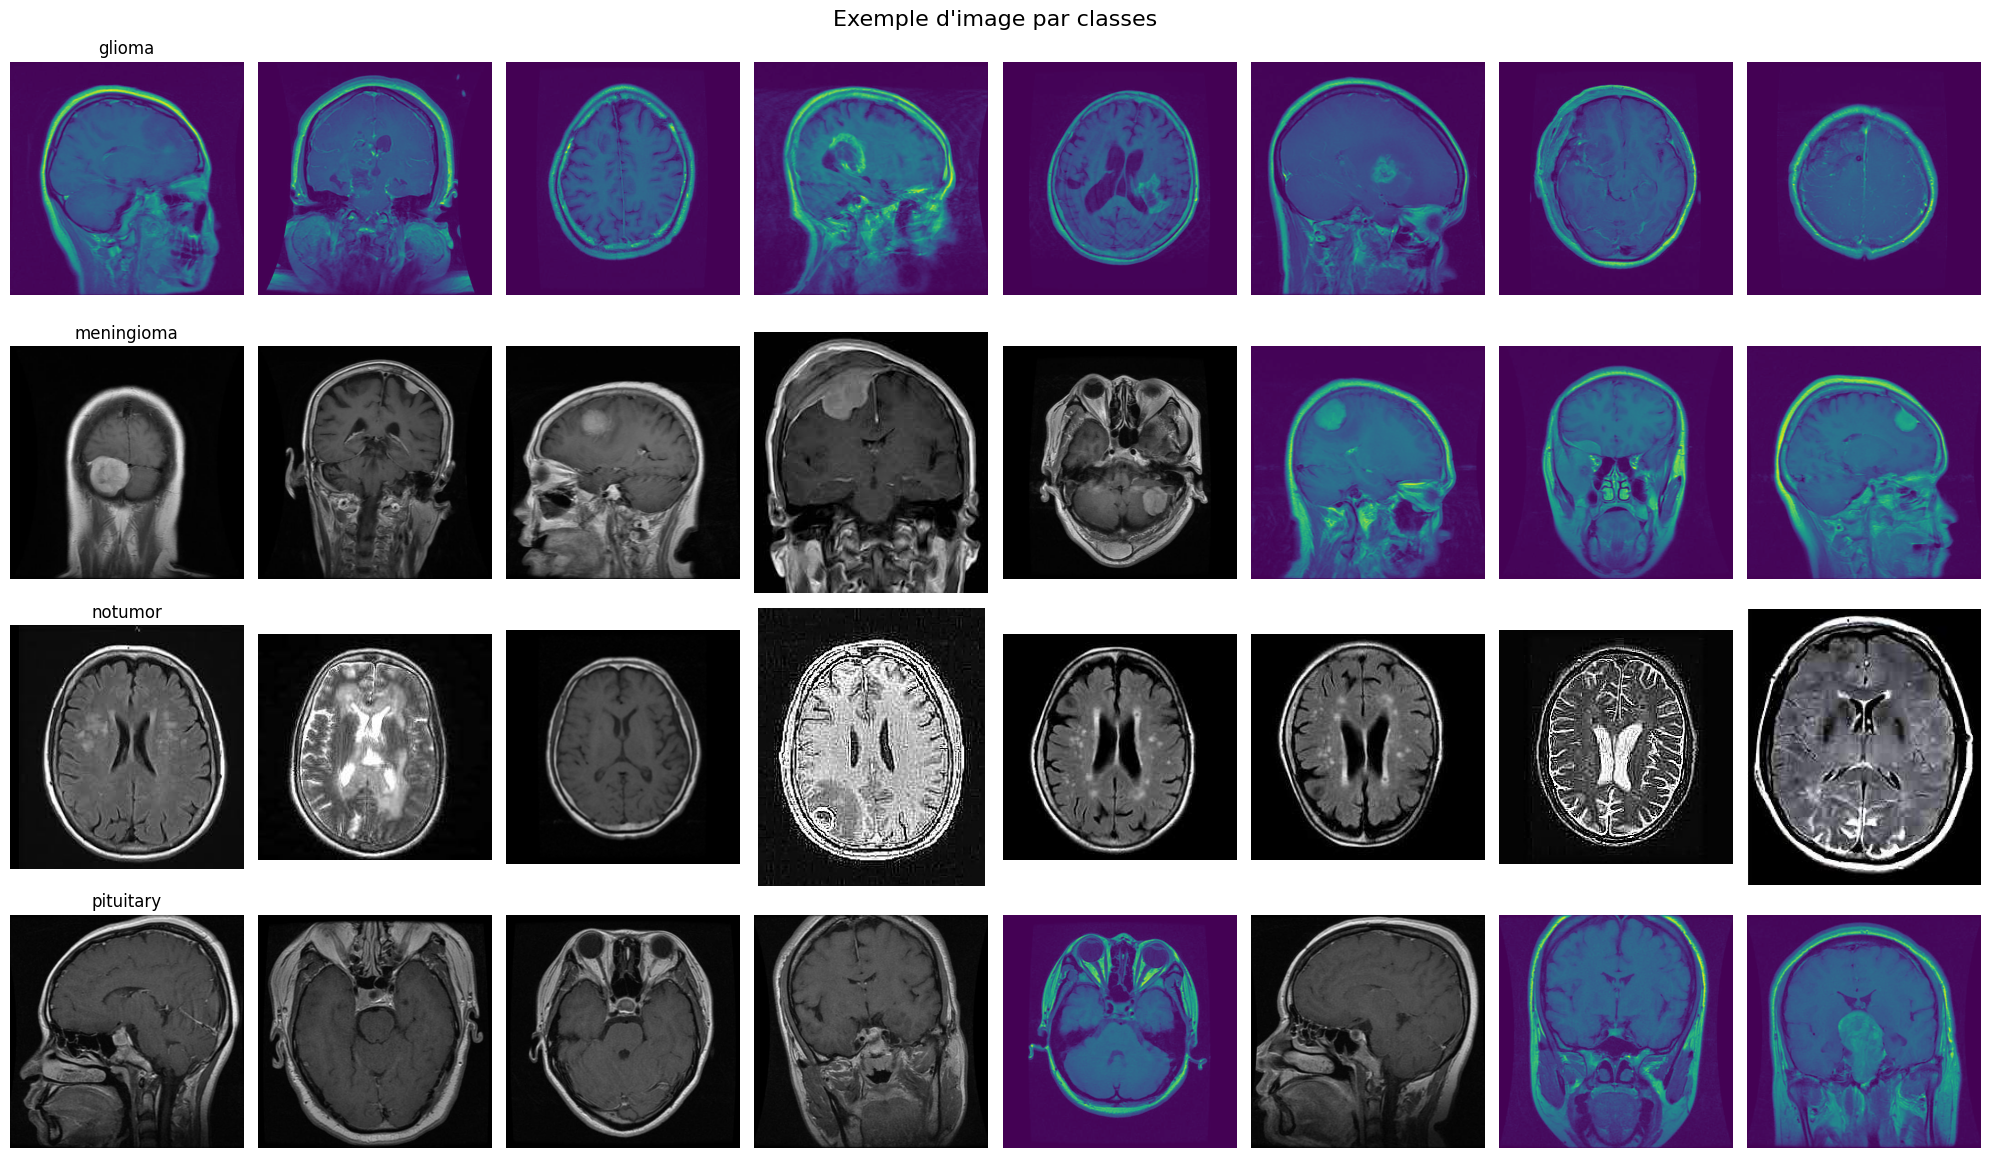

In [ ]:
fig, axes = plt.subplots(4, 8, figsize=(20, 12))
for i, label in enumerate(class_names):
    sample_images = train_df[train_df['label'] == label].sample(8)['image_path'].values
    for j, img_path in enumerate(sample_images):
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis("off")
        if j == 0:
            axes[i, j].set_title(label, fontsize=12)
plt.suptitle("Exemple d'image par Classes", fontsize=16)
plt.tight_layout()
plt.show()

## 3.3-Dimensions des images du Dataset

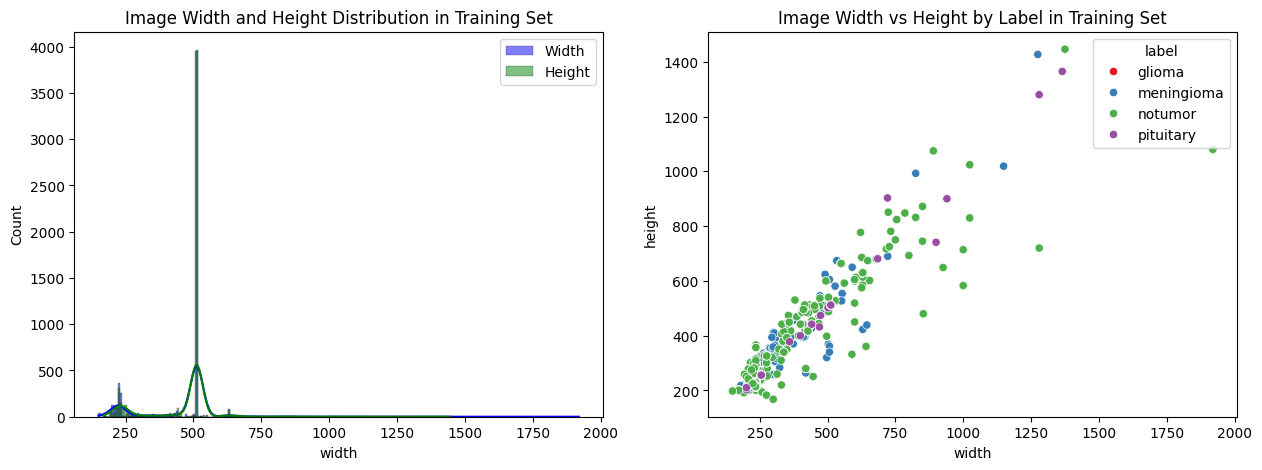

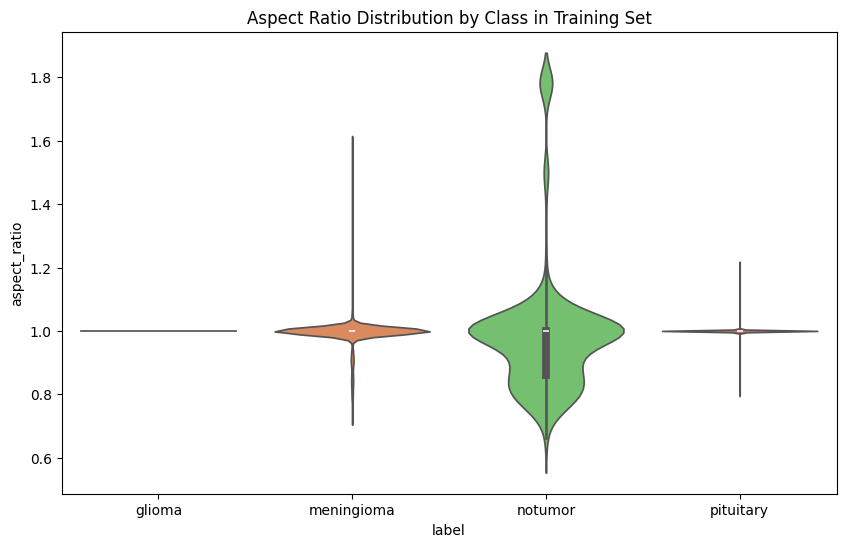

In [5]:
# Collecter les dimensions des images
train_df['image_size'] = train_df['image_path'].apply(lambda x: Image.open(x).size)
test_df['image_size'] = test_df['image_path'].apply(lambda x: Image.open(x).size)

# Separer les dimensions en largeur et hauteur
train_df['width'], train_df['height'] = zip(*train_df['image_size'])
test_df['width'], test_df['height'] = zip(*test_df['image_size'])

# Graphique de distribution des dimensions des images
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(train_df['width'], kde=True, ax=ax[0], color="blue", label="Width")
sns.histplot(train_df['height'], kde=True, ax=ax[0], color="green", label="Height")
ax[0].set_title("Image Width and Height Distribution in Training Set")
ax[0].legend()

sns.scatterplot(data=train_df, x="width", y="height", hue="label", ax=ax[1], palette="Set1")
ax[1].set_title("Image Width vs Height by Label in Training Set")
plt.show()

train_df['aspect_ratio'] = train_df['width'] / train_df['height']
test_df['aspect_ratio'] = test_df['width'] / test_df['height']

# Graphique de distribution du ratio d'aspect
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_df, x="label", y="aspect_ratio", palette="muted")
plt.title("Aspect Ratio Distribution by Class in Training Set")
plt.show()

## 3.4-Luminosité des images

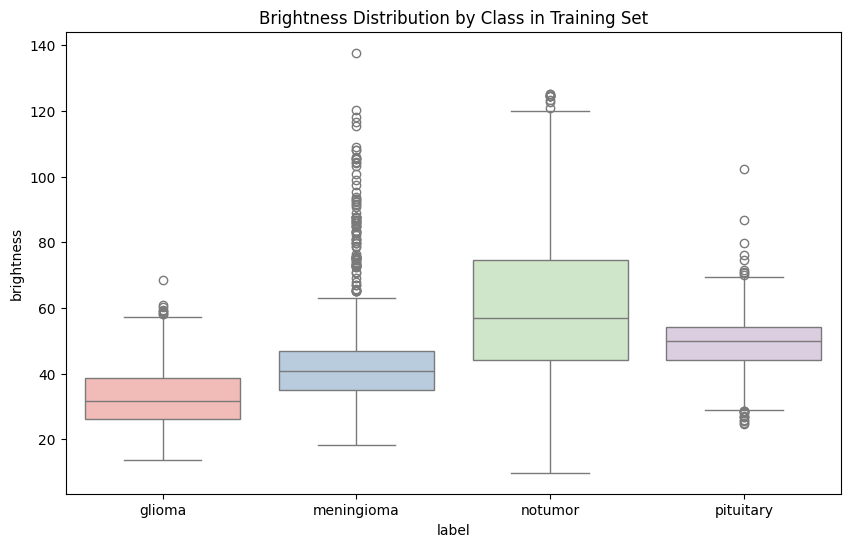

In [6]:
# Calculer la luminosité moyenne des images
train_df['brightness'] = train_df['image_path'].apply(lambda x: np.array(Image.open(x)).mean())
test_df['brightness'] = test_df['image_path'].apply(lambda x: np.array(Image.open(x)).mean())

# Graphique de distribution de la luminosité
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df, x="label", y="brightness", palette="Pastel1")
plt.title("Brightness Distribution by Class in Training Set")
plt.show()